In [1]:
import tempfile, subprocess, urllib.request, zipfile
import pandas as pd, numpy as np
import datetime
%matplotlib inline
from diagnose import diagnose

## load data and some formatting

In [2]:
with tempfile.TemporaryDirectory() as tmpdir:
    urllib.request.urlretrieve(
        'http://files.grouplens.org/datasets/movielens/ml-100k.zip',
        tmpdir + '/ml-100k.zip')
    zipfile.ZipFile(tmpdir + '/ml-100k.zip').extractall(tmpdir)
    print(subprocess.check_output(['ls', tmpdir+'/ml-100k']).decode('utf-8'))

    interactions = pd.read_csv(
        tmpdir + '/ml-100k/u.data',
        sep='\t',
        names=['USER_ID','ITEM_ID','RATING', 'TIMESTAMP'])

    users = pd.read_csv(
        tmpdir + '/ml-100k/u.user',
        sep='|',
        names=['USER_ID','AGE','GENDER','OCCUPATION','ZIPCODE'],
    )

    items = pd.read_csv(
        tmpdir + '/ml-100k/u.item',
        sep='|', encoding='latin1',
        names=['ITEM_ID', '_TITLE', 'CREATION_TIMESTAMP', '_', '_IMDb_URL'] + ['GENRE.%s'%i for i in range(19)],
    )

README
allbut.pl
mku.sh
u.data
u.genre
u.info
u.item
u.occupation
u.user
u1.base
u1.test
u2.base
u2.test
u3.base
u3.test
u4.base
u4.test
u5.base
u5.test
ua.base
ua.test
ub.base
ub.test



In [3]:
# CREATION_TIMESTAMP may become a reserved keyword and its behavior may change without further notice.
items.loc[items['CREATION_TIMESTAMP'].notnull(), 'CREATION_TIMESTAMP'] = items['CREATION_TIMESTAMP'].dropna().apply(
    lambda x:datetime.datetime.strptime(str(x), '%d-%b-%Y').timestamp())
items.fillna({'CREATION_TIMESTAMP': items['CREATION_TIMESTAMP'].min()}, inplace=True)

## run diagnose scripts

########################################
# DIAGNOSING INTERACTIONS TABLE, SAMPLE:
########################################
       USER_ID  ITEM_ID  RATING  TIMESTAMP
91003      918      168       3  891986999
4387        42      380       4  881108548
52378      660      177       2  891200014
62506      617      646       4  883789386
50764      521      763       4  884476152
21355      303      720       2  879468375
34381      321      513       4  879440294
36025      200       43       3  884129814
381        271      378       4  885849447
25150      416     1400       4  886317029
DESCRIBE  
            USER_ID        ITEM_ID         RATING     TIMESTAMP
count  100000.00000  100000.000000  100000.000000  1.000000e+05
mean      462.48475     425.530130       3.529860  8.835289e+08
std       266.61442     330.798356       1.125674  5.343856e+06
min         1.00000       1.000000       1.000000  8.747247e+08
25%       254.00000     175.000000       3.000000  8.794487e+08
50%      

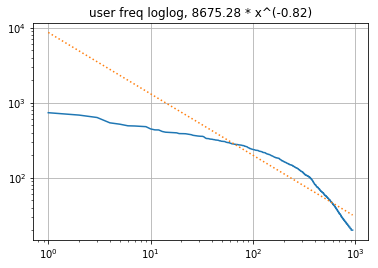

=== unique ITEM_ID describe ===
count    1682.000000
mean       59.453032
std        80.383846
min         1.000000
25%         6.000000
50%        27.000000
75%        80.000000
max       583.000000
dtype: float64


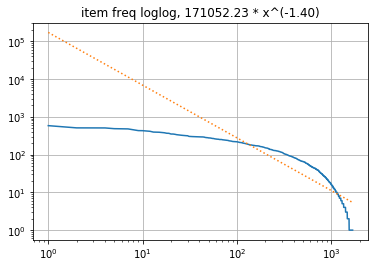

=== hourly activity pattern ===
0     5172
1     5135
2     4644
3     4853
4     4246
5     4190
6     3500
7     1540
8     1133
9     1951
10    1185
11     637
12     956
13    1662
14    3149
15    3107
16    5426
17    6278
18    6755
19    7112
20    6265
21    8191
22    7231
23    5682
dtype: int64
=== day of week activity pattern ===
0    13174
1    13933
2    16621
3    13364
4    15918
5    15077
6    11913
dtype: int64


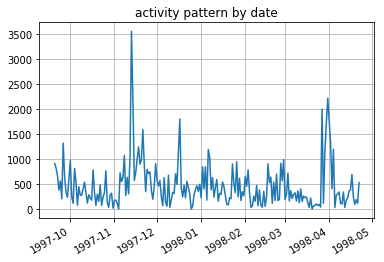

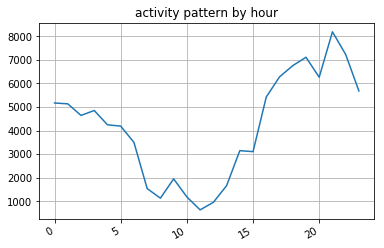

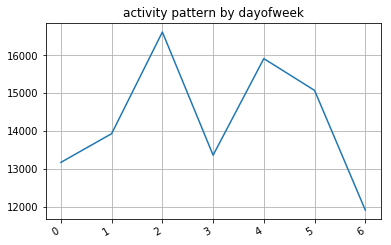

=== session time delta describe ===
count    9.905700e+04
mean     1.921129e+04
std      2.886168e+05
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      3.700000e+01
max      1.749021e+07
Name: TIMESTAMP, dtype: float64


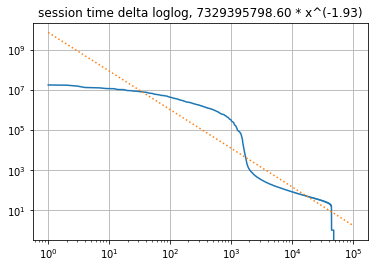

=== user time span describe ===
count    9.430000e+02
mean     2.018041e+06
std      4.389324e+06
min      1.200000e+02
25%      1.057000e+03
50%      2.961000e+03
75%      7.398970e+05
max      1.836258e+07
Name: TIMESTAMP, dtype: float64


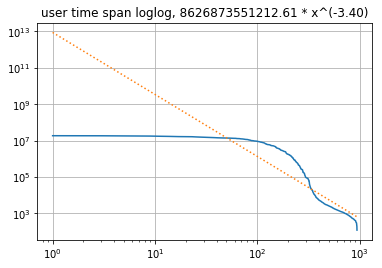

=== number of days when an item stays as daily top-1 ===
ITEM_ID
313    16
50     15
258    11
127     8
1       7
294     7
181     6
117     6
100     6
272     5
dtype: int64
=== number of days when an item stays in daily top-5 ===
ITEM_ID
313    48
50     45
258    40
288    32
286    31
294    30
300    26
1      26
100    24
181    23
dtype: int64
########################################
# DIAGNOSING USERS TABLE, SAMPLE:
########################################
     USER_ID  AGE GENDER     OCCUPATION ZIPCODE
506      507   18      F         writer   28450
751      752   60      M        retired   21201
192      193   29      M        student   49931
56        57   16      M           none   84010
301      302   42      M       educator   77904
561      562   54      F  administrator   20879
487      488   48      M     technician   21012
632      633   35      M     programmer   55414
472      473   29      M        student   94708
689      690   35      M       salesman   63304


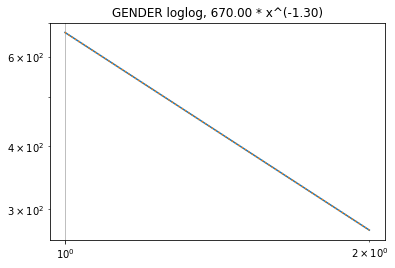

OCCUPATION  multi-category stats:
count    943.0
mean       1.0
std        0.0
min        1.0
25%        1.0
50%        1.0
75%        1.0
max        1.0
Name: OCCUPATION, dtype: float64
OCCUPATION  top categories:
student          196
other            105
educator          95
administrator     79
engineer          67
programmer        66
librarian         51
writer            45
executive         32
scientist         31
dtype: int64


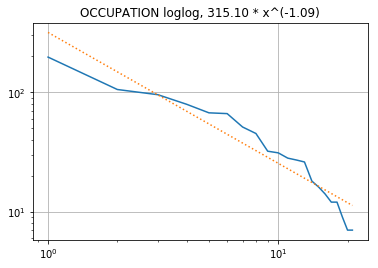

ZIPCODE  multi-category stats:
count    943.0
mean       1.0
std        0.0
min        1.0
25%        1.0
50%        1.0
75%        1.0
max        1.0
Name: ZIPCODE, dtype: float64
ZIPCODE  top categories:
55414    9
55105    6
10003    5
20009    5
55337    5
27514    4
55454    4
55408    4
63108    3
22903    3
dtype: int64


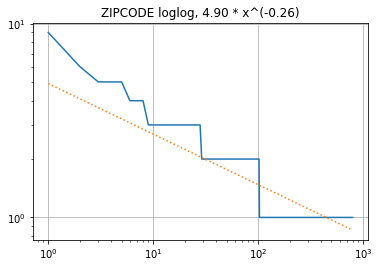

=== user meta-data missing rate ===
USER_ID       0.0
AGE           0.0
GENDER        0.0
OCCUPATION    0.0
ZIPCODE       0.0
dtype: float64
rate of interactions without user meta-data 0.0
rate of new users not referenced in interactions table 0.0
########################################
# DIAGNOSING ITEMS TABLE, SAMPLE:
########################################
      ITEM_ID                                _TITLE  CREATION_TIMESTAMP   _  \
452       453                       Jaws 3-D (1983)         410256000.0 NaN   
1108     1109           Death and the Maiden (1994)         757411200.0 NaN   
1360     1361  Search for One-eye Jimmy, The (1996)         820483200.0 NaN   
1488     1489                        Chasers (1994)         757411200.0 NaN   
1364     1365               Johnny 100 Pesos (1993)         725875200.0 NaN   
1262     1263                        Foxfire (1996)         840783600.0 NaN   
583       584             Secret Garden, The (1993)         725875200.0 NaN   
868 

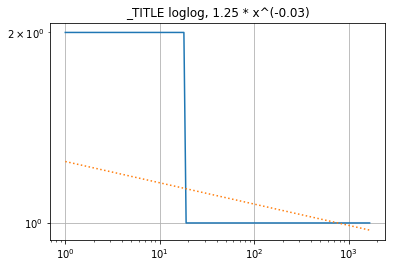

_IMDb_URL  multi-category stats:
count    1682.0
mean        1.0
std         0.0
min         1.0
25%         1.0
50%         1.0
75%         1.0
max         1.0
Name: _IMDb_URL, dtype: float64
_IMDb_URL  top categories:
nan                                                                            3
http://us.imdb.com/M/title-exact?Kull+the+Conqueror+(1997)                     2
http://us.imdb.com/M/title-exact?Hugo+Pool+(1997)                              2
http://us.imdb.com/M/title-exact?Liar+(1997)                                   2
http://us.imdb.com/M/title-exact?Ulee%27s+Gold+(1997)                          2
http://us.imdb.com/M/title-exact?Designated%20Mourner%2C%20The%20%281997%29    2
http://us.imdb.com/M/title-exact?Ice+Storm%2C+The+(1997)                       2
http://us.imdb.com/M/title-exact?Chasing+Amy+(1997)                            2
http://us.imdb.com/Title?Hurricane+Streets+(1998)                              2
http://us.imdb.com/M/title-exact?Nightwatch%20(1997

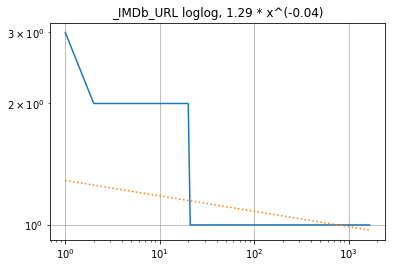

=== item meta-data missing rate ===
ITEM_ID               0.000000
_TITLE                0.000000
CREATION_TIMESTAMP    0.000000
_                     1.000000
_IMDb_URL             0.001784
GENRE.0               0.000000
GENRE.1               0.000000
GENRE.2               0.000000
GENRE.3               0.000000
GENRE.4               0.000000
GENRE.5               0.000000
GENRE.6               0.000000
GENRE.7               0.000000
GENRE.8               0.000000
GENRE.9               0.000000
GENRE.10              0.000000
GENRE.11              0.000000
GENRE.12              0.000000
GENRE.13              0.000000
GENRE.14              0.000000
GENRE.15              0.000000
GENRE.16              0.000000
GENRE.17              0.000000
GENRE.18              0.000000
dtype: float64
rate of interactions without item meta-data 0.0
rate of new items not referenced in interactions table 0.0


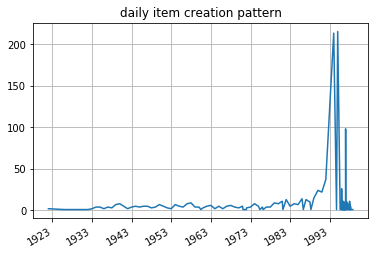

In [4]:
diagnose(interactions, users, items)

# another set of examples

In [5]:
with tempfile.TemporaryDirectory() as tmpdir:
    urllib.request.urlretrieve(
        'http://files.grouplens.org/datasets/movielens/ml-1m.zip',
        tmpdir + '/ml-1m.zip')
    zipfile.ZipFile(tmpdir + '/ml-1m.zip').extractall(tmpdir)
    print(subprocess.check_output(['ls', tmpdir+'/ml-1m']).decode('utf-8'))
    
    interactions = pd.read_csv(
        tmpdir + '/ml-1m/ratings.dat',
        sep='::',
        names=['USER_ID','ITEM_ID','RATING', 'TIMESTAMP'])

    users = pd.read_csv(
        tmpdir + '/ml-1m/users.dat',
        sep='::',
        names=['USER_ID','GENDER','AGE','OCCUPATION','ZIPCODE'],
    )

    items = pd.read_csv(
        tmpdir + '/ml-1m/movies.dat',
        sep='::', encoding='latin1',
        names=['ITEM_ID', '_TITLE', 'GENRES'],
    )

README
movies.dat
ratings.dat
users.dat



/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  # This is added back by InteractiveShellApp.init_path()
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:16: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  app.launch_new_instance()
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:22: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.


########################################
# DIAGNOSING INTERACTIONS TABLE, SAMPLE:
########################################
        USER_ID  ITEM_ID  RATING   TIMESTAMP
671442     4033      179       1   965523342
384629     2247      922       5   979274860
495156     3038      661       3  1018061231
980592     5916     3536       4   957359510
630012     3808     2015       2   965966200
93691       628      708       4   975782490
699811     4186       70       3  1017932233
551285     3394     2391       3   967493436
333012     1963     1729       4   974692426
971753     5854     1346       4   958346522
DESCRIBE  
            USER_ID       ITEM_ID        RATING     TIMESTAMP
count  1.000209e+06  1.000209e+06  1.000209e+06  1.000209e+06
mean   3.024512e+03  1.865540e+03  3.581564e+00  9.722437e+08
std    1.728413e+03  1.096041e+03  1.117102e+00  1.215256e+07
min    1.000000e+00  1.000000e+00  1.000000e+00  9.567039e+08
25%    1.506000e+03  1.030000e+03  3.000000e+00  9.653026e+08

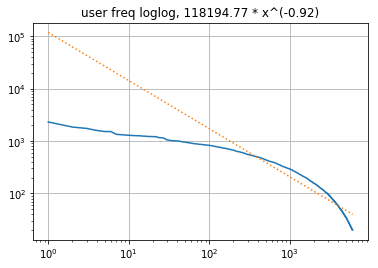

=== unique ITEM_ID describe ===
count    3706.000000
mean      269.889099
std       384.047838
min         1.000000
25%        33.000000
50%       123.500000
75%       350.000000
max      3428.000000
dtype: float64


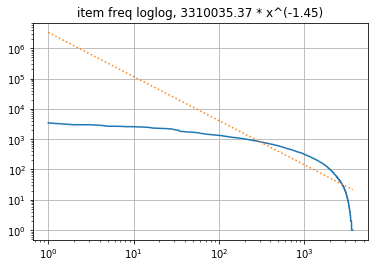

=== hourly activity pattern ===
0     55397
1     58223
2     59068
3     62396
4     55443
5     42064
6     33987
7     27519
8     20547
9     12959
10     9370
11     8617
12    13221
13    20917
14    28865
15    40385
16    48954
17    53565
18    59138
19    59201
20    59709
21    65491
22    55098
23    50075
dtype: int64
=== day of week activity pattern ===
0    173931
1    159272
2    141176
3    142722
4    129438
5    108692
6    144978
dtype: int64


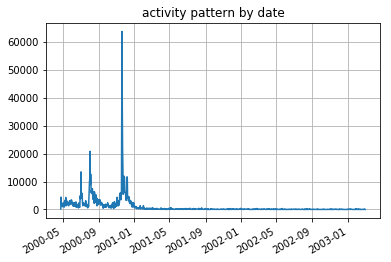

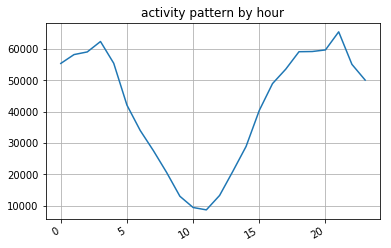

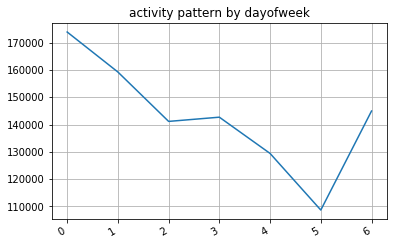

=== session time delta describe ===
count    9.941690e+05
mean     4.986574e+04
std      9.525371e+05
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      3.000000e+01
max      8.892327e+07
Name: TIMESTAMP, dtype: float64


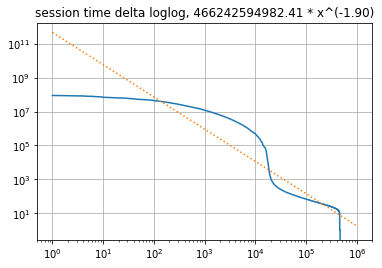

=== user time span describe ===
count    6.040000e+03
mean     8.207777e+06
std      1.917298e+07
min      1.060000e+02
25%      1.207500e+03
50%      4.068500e+03
75%      2.021375e+06
max      8.924779e+07
Name: TIMESTAMP, dtype: float64


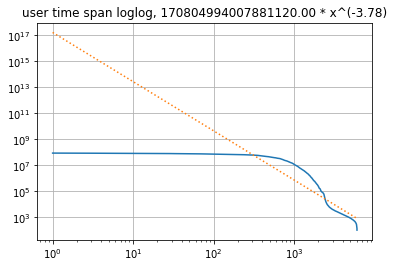

=== number of days when an item stays as daily top-1 ===
ITEM_ID
2858    57
3897    28
1196    21
3911    21
3948    20
3949    16
260     16
1210    16
2762    15
608     14
dtype: int64
=== number of days when an item stays in daily top-5 ===
ITEM_ID
2858    120
260      82
1196     81
3897     79
1210     77
3911     56
3948     56
3578     55
608      50
2762     47
dtype: int64
########################################
# DIAGNOSING USERS TABLE, SAMPLE:
########################################
      USER_ID GENDER  AGE  OCCUPATION ZIPCODE
5904     5905      F   35          20   78006
4928     4929      M   45           1   63105
3090     3091      F   25           0   19107
2895     2896      M   18          14   60073
3358     3359      M   25          20   22936
1289     1290      M   35           0   91504
1499     1500      M   25          17   98115
2902     2903      M   25          16   20850
5820     5821      M   25          15   02139
2552     2553      M   25           7 

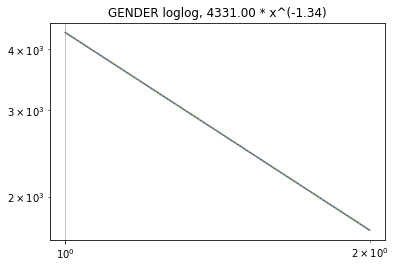

ZIPCODE  multi-category stats:
count    6040.0
mean        1.0
std         0.0
min         1.0
25%         1.0
50%         1.0
75%         1.0
max         1.0
Name: ZIPCODE, dtype: float64
ZIPCODE  top categories:
48104    19
22903    18
94110    17
55104    17
55455    16
10025    16
55105    16
94114    15
02138    15
55408    15
dtype: int64


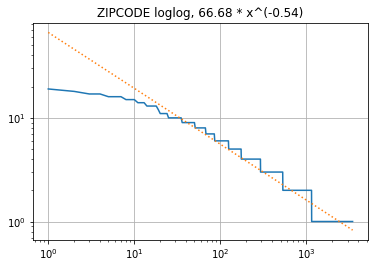

=== user meta-data missing rate ===
USER_ID       0.0
GENDER        0.0
AGE           0.0
OCCUPATION    0.0
ZIPCODE       0.0
dtype: float64
rate of interactions without user meta-data 0.0
rate of new users not referenced in interactions table 0.0
########################################
# DIAGNOSING ITEMS TABLE, SAMPLE:
########################################
      ITEM_ID                                             _TITLE  \
1462     1494                              Sixth Man, The (1997)   
1377     1398                             In Love and War (1996)   
3839     3909                                Woman on Top (2000)   
1179     1197                         Princess Bride, The (1987)   
3424     3493  Torso (Corpi Presentano Tracce di Violenza Car...   
2421     2490                                     Payback (1999)   
1191     1209                Once Upon a Time in the West (1969)   
3822     3892                          Anatomy (Anatomie) (2000)   
1808     1877           

/anaconda3/lib/python3.7/site-packages/matplotlib/axes/_base.py:3471: UserWarning: Attempting to set identical bottom==top results
in singular transformations; automatically expanding.
bottom=1.0, top=1.0
  'bottom=%s, top=%s') % (bottom, top))


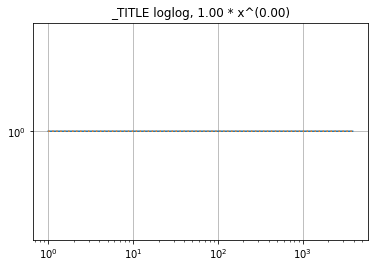

GENRES  multi-category stats:
count    3883.000000
mean        1.650270
std         0.804589
min         1.000000
25%         1.000000
50%         1.000000
75%         2.000000
max         6.000000
Name: GENRES, dtype: float64
GENRES  top categories:
Drama         1603
Comedy        1200
Action         503
Thriller       492
Romance        471
Horror         343
Adventure      283
Sci-Fi         276
Children's     251
Crime          211
dtype: int64


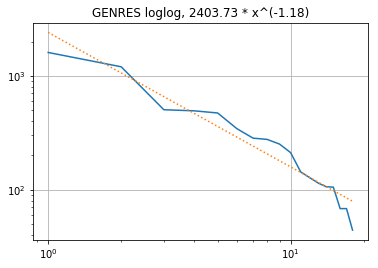

=== item meta-data missing rate ===
ITEM_ID    0.0
_TITLE     0.0
GENRES     0.0
dtype: float64
rate of interactions without item meta-data 0.0
rate of new items not referenced in interactions table 0.045583311872263714
CREATION_TIMESTAMP not found in items table


In [6]:
diagnose(interactions, users, items)